<a href="https://colab.research.google.com/github/rileythejones/DS-Unit-1-Sprint-2-Statistics/blob/master/Riley_Jones_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [1]:
![Bayes Theorem Drug Test Example](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `[Bayes Theorem Drug Test Example](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)'


![Bayes Theorem Drug Test Example](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  result = ((1-false_positive_rate)*prob_drunk_prior)/(((1-false_positive_rate) * prob_drunk_prior) + (false_positive_rate * (1-prob_drunk_prior)))
  return result
  

In [3]:
prob_drunk_given_positive(0.005, 0.01)

0.33221476510067116

In [4]:
prob_drunk_given_positive(0.001, 0.08)

0.011380504700643244

In [5]:
prob_drunk_given_positive(0.011380504700643244, 0.08)

0.11690607734806628

In [6]:
prob_drunk_given_positive(0.11690607734806628, 0.08)

0.6035517634803313

In [7]:
prob_drunk_given_positive(0.6035517634803313, 0.08)

0.9459680554381814

In [0]:
prob_drunk_given_positive(0.9459680554381814, 0.08)

0.9950577515521439

We can see that the test would have to run 5 times to reach over 95% odds as the posterior probability changes with each iteration. 

In [0]:
import pandas as pd 
import numpy as np
from scipy import stats

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=['party',
'handicapped infants', 'water project cost sharing',
'adoption of the budget resolution', 'physician fee freeze', 'el salvador aid', 'religious groups in schools',
'anti satellite test ban', 'aid to nicaraguan contras', 'mx missile',
'immigration', 'synfuels corporation cutback',
'education spending', 'superfund right to sue', 'crime', 'duty free exports',
'export administration act south africa'])

df = df.replace({'?':np.NaN, 'n':int(0), 'y':int(1)})
rep = df[df.party =='republican'].dropna()
dem = df[df.party =='democrat'].dropna()

In [9]:
rep.head()

,party,handicapped infants,water project cost sharing,adoption of the budget resolution,physician fee freeze,el salvador aid,religious groups in schools,anti satellite test ban,aid to nicaraguan contras,mx missile,immigration,synfuels corporation cutback,education spending,superfund right to sue,crime,duty free exports,export administration act south africa
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
28,republican,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
30,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
33,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
35,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [0]:

BCI =  stats.bayes_mvs(rep['immigration'], alpha=0.95)


In [0]:

def frequentist_interval(data, confidence=0.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean , mean-interval, mean+interval)

FCI = frequentist_interval(rep['immigration'], confidence=.95)


In [12]:
BCI

(Mean(statistic=0.5740740740740741, minmax=(0.4793093369789436, 0.6688388111692045)),
 Variance(statistic=0.25149911816578485, minmax=(0.1920305470396232, 0.3289954561842159)),
 Std_dev(statistic=0.5003042756934237, minmax=(0.4382129014983735, 0.5735812550844177)))

In [13]:
FCI

(0.5740740740740741, 0.4793093369789436, 0.6688388111692045)

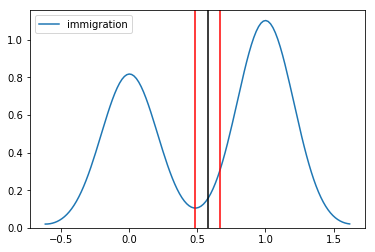

In [14]:
# Frequentist Confidence Interval
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(rep['immigration'])
plt.axvline(x=FCI[1], color='red')
plt.axvline(x=FCI[2], color='red')
plt.axvline(x=FCI[0], color='k');

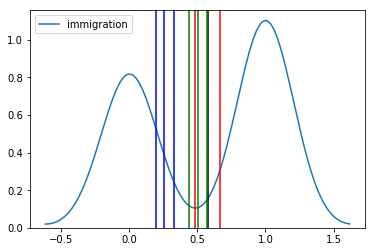

In [15]:
# Bayesian Confidence Interval

sns.kdeplot(rep['immigration'])
plt.axvline(x=BCI[0][1][0], color='red')
plt.axvline(x=BCI[0][1][1], color='red')
plt.axvline(x=BCI[0][0], color='k')
plt.axvline(x=BCI[1][0], color='b')
plt.axvline(x=BCI[1][1][0], color='b')
plt.axvline(x=BCI[1][1][1], color='b')
plt.axvline(x=BCI[2][0], color='g')
plt.axvline(x=BCI[2][1][0], color='g')
plt.axvline(x=BCI[2][1][1], color='g');




Bayesian statistics deals with probability distributions that change based on new information. 
Frequentist statistics deals with discrete probabilities based on a set of past outcomes. 

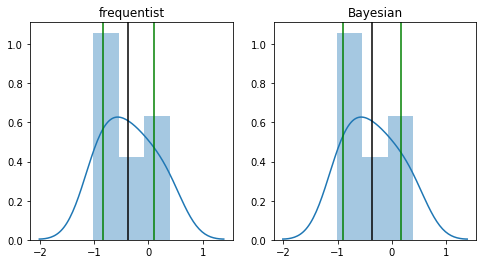

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

def compare(n_samples=10):
    data = stats.norm.rvs(size=n_samples)
    # Bayesian
    res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)
    # frequentist
    frq_mean = np.mean(data)
    frq_var = stats.norm.var(data)
    frq_std = np.std(data)

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))
    sns.distplot(data, ax=ax0)
    sns.distplot(data, ax=ax1)
    ax0.set_title('frequentist')
    ax1.set_title('Bayesian')

    ax0.axvline(x=frq_mean, color='k')
    ax0.axvline(x=frq_mean-frq_std, color='g')
    ax0.axvline(x=frq_mean+frq_std, color='g')

    ax1.axvline(x=res_mean[0], color='k')
    ax1.axvline(x=res_mean[0]-res_std[0], color='g')
    ax1.axvline(x=res_mean[0]+res_std[0], color='g');

compare(n_samples=10)

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!